# 5. 예측 모델링

+ 어린이 교통사고 발생이 Count 데이터이고 포아송 분포의 양상을 띔으로, 포아송 회귀, 음이항 회귀 모델을 적용하여 중요 변수 파악
+ 이후 gwr를 통해 지역별 변수 영향및 중요도를 파악

## 포아송 회귀 

In [95]:
#Poisson 회귀
poisson1 = poisson('accident_cnt ~ parking + car_cnt + pop_whole + pop_kid + \
                    crswlk + trf_lit + trf_sign_n + cross_all + cctv + dist_aca+ dist_apt+ lane + traffic_car +TMST_16_x', data = data2_ad_log).fit()
print(poisson1.summary())

Optimization terminated successfully.
         Current function value: 0.504966
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:           accident_cnt   No. Observations:                 1787
Model:                        Poisson   Df Residuals:                     1772
Method:                           MLE   Df Model:                           14
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.3041
Time:                        23:21:08   Log-Likelihood:                -902.37
converged:                       True   LL-Null:                       -1296.6
Covariance Type:            nonrobust   LLR p-value:                3.222e-159
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5886      0.325     -7.962      0.000      -3.226      -1.951
parking         0.0644    

/opt/app-root/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/app-root/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


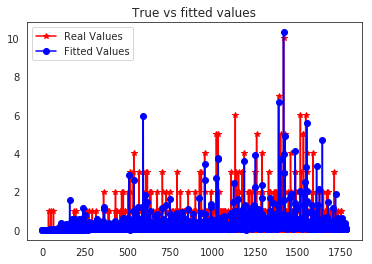

In [96]:
preds = poisson1.predict()
plt.plot(range(len(data2_ad_log.accident_cnt)), data2_ad_log.accident_cnt, 'r*-', range(len(data2_ad_log.accident_cnt)), preds, 'bo-')
plt.title('True vs fitted values')
plt.legend(['Real Values', 'Fitted Values'])
plt.show()

## 음이항 회귀

In [97]:
# Negetivebinomial - Overdispersion 고려
nb1 = poisson('accident_cnt ~ parking + car_cnt + pop_whole + pop_kid + \
                    crswlk + trf_lit + trf_sign_n + cross_all + cctv + dist_aca+ dist_apt+ lane + traffic_car +TMST_16_x', data = data2_ad_log).fit()
print(nb1.summary())

Optimization terminated successfully.
         Current function value: 0.504966
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:           accident_cnt   No. Observations:                 1787
Model:                        Poisson   Df Residuals:                     1772
Method:                           MLE   Df Model:                           14
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.3041
Time:                        23:21:09   Log-Likelihood:                -902.37
converged:                       True   LL-Null:                       -1296.6
Covariance Type:            nonrobust   LLR p-value:                3.222e-159
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5886      0.325     -7.962      0.000      -3.226      -1.951
parking         0.0644    

/opt/app-root/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/app-root/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


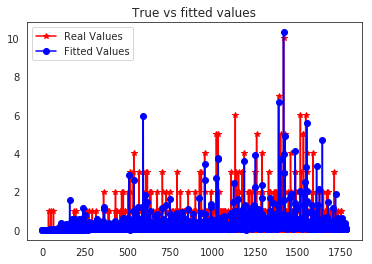

In [98]:
preds = nb1.predict()
plt.plot(range(len(data2_ad_log.accident_cnt)), data2_ad_log.accident_cnt, 'r*-', range(len(data2_ad_log.accident_cnt)), preds, 'bo-')
plt.title('True vs fitted values')
plt.legend(['Real Values', 'Fitted Values'])
plt.show()

+ 'parking','crswlk', 'trf_lit', 'cross_all', 'dist_aca','dist_apt', 'traffic_car','TMST_16_x' 이상 8개 변수 선택

## GWR(Geographically weighted Regression)

+ 지역간 상관성을 고려한 회귀모델

In [99]:
X = data2_ad_log[['parking','crswlk', 'trf_lit', 'cross_all', 'dist_aca','dist_apt', 'traffic_car','TMST_16_x']]

y = data2_ad_log['accident_cnt']

In [100]:
#sns.pairplot(X)

In [101]:
g_y = y.values.reshape(-1,1)
g_X = X.values

u = data2_ad_log.geometry.centroid.x
v = data2_ad_log.geometry.centroid.y
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.
/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


In [102]:
#gwr_selector = Sel_BW(g_coords, g_y, g_X)
#gwr_bw = gwr_selector.search(bw_min=2)
#print(gwr_bw)
#bandweight = 90

gwr_results = GWR(g_coords, g_y, g_X, bw = 90).fit()

/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=6.34409e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=4.28737e-20): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=2.96819e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.45577e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=5.5485e-19): result may not be accurate.
  xtx_inv_xt = linalg.solve(xtx, xT)
/opt/app-root/lib/python3.6/site-packages/spglm/iwls.py:37: LinAlgWarning: Ill-co

In [103]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1787
Number of covariates:                                                     9

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            766.966
Log-likelihood:                                                   -1779.875
AIC:                                                               3577.750
AICc:                                                              3579.874
BIC:                                                             -12547.220
R2:                                                                   0.276
Adj. R2:                                                              0.273

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------